In [ ]:
.import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

aus = pd.read_csv("/content/drive/MyDrive/Mineria Datos/ET/weatherAUS.csv")
aus


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No



# **Primera Fase de analisis**







## Preguntas que resolveremos

> En esta parte tenemos que hacernos preguntas como:

1. ¿cual fue el año y dia en que hubo mas lluvia ? 
2. ¿en que ciudad habido la mayor y menor temperatura?
3. en que ciudad llovio mas?
4. Direcciones del viento.




## Observemos la data

En esta seccion podremos observar los diferentes datos y columnas que tiene nuestra data de clima en australia

In [ ]:
aus.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


## Exploración de datos

In [ ]:
aus.dtypes # En esta seccion veremos los distintos tipos de datos que tiene nuestra data

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [ ]:
nulos = aus.isnull().sum()
nombreCol = aus.columns
totalNulos = aus.isnull().sum().sum()
for c,n in zip(nulos, nombreCol):
    print(f'La columna {n} tiene un total de {c} datos nulos')
print(f'En total existen {totalNulos} datos nulos dentro del DataSet')

La columna Date tiene un total de 0 datos nulos
La columna Location tiene un total de 0 datos nulos
La columna MinTemp tiene un total de 637 datos nulos
La columna MaxTemp tiene un total de 322 datos nulos
La columna Rainfall tiene un total de 1406 datos nulos
La columna Evaporation tiene un total de 60843 datos nulos
La columna Sunshine tiene un total de 67816 datos nulos
La columna WindGustDir tiene un total de 9330 datos nulos
La columna WindGustSpeed tiene un total de 9270 datos nulos
La columna WindDir9am tiene un total de 10013 datos nulos
La columna WindDir3pm tiene un total de 3778 datos nulos
La columna WindSpeed9am tiene un total de 1348 datos nulos
La columna WindSpeed3pm tiene un total de 2630 datos nulos
La columna Humidity9am tiene un total de 1774 datos nulos
La columna Humidity3pm tiene un total de 3610 datos nulos
La columna Pressure9am tiene un total de 14014 datos nulos
La columna Pressure3pm tiene un total de 13981 datos nulos
La columna Cloud9am tiene un total de 5

###### La columna que tiene mayor cantidad de nulos es la de Sunshine y la que tienen ningún nulo son RainTomarrow, RISK_MM, Location y Date.

En total hay 49 ciudades


**Promedios**

In [ ]:
#Promedio del tiempo vivo de los jugadores durante la ronda
print('-------------------------------Temperatura--------------------------------------------')
TMP = aus['MaxTemp'].mean()
print("El promedio de la temperatura máxima en las ciudades es de: ", TMP)
TMIP = aus['MinTemp'].mean()
print('El Promedio de la temperatura mínima en las ciudades es de: ', TMIP)
TP9AM = aus['Temp9am'].mean()
print('El Promedio de la temperatura a las 9am en las ciudades es de: ', TP9AM)
TP3PM = aus['Temp3pm'].mean()
print('El Promedio de la temperatura a las 3pm en las ciudades es de: ', TP3PM)
print('---------------------------------------------------------------------------------')
PRMF = aus['WindGustSpeed'].mean()
print('El Promedio de la ráfaga de viento más fuerte es de: ',PRMF)
print('-----------------------------------------------------------------------------------')
PEV = aus['Evaporation'].mean()
print('El Promedio de la evaporación es de: ',PEV)



-------------------------------Temperatura--------------------------------------------
El promedio de la temperatura máxima en las ciudades es de:  23.226784191272444
El Promedio de la temperatura mínima en las ciudades es de:  12.186399728729098
El Promedio de la temperatura a las 9am en las ciudades es de:  16.98750858170133
El Promedio de la temperatura a las 3pm en las ciudades es de:  21.68723497314744
---------------------------------------------------------------------------------
El Promedio de la ráfaga de viento más fuerte es de:  39.98429165757619
-----------------------------------------------------------------------------------
El Promedio de la evaporación es de:  5.469824216349123


Gracias a la acción realizada anteriormente, podemos obtener con certeza cuales son los promedios de algunas características meteorologicas de las ciudades y el país Australia, de esta forma esto es un aporte en ir respondiendo nuestras preguntas.

**Mínimos y Máximos**

In [ ]:
print('Temperaturas:')
MT = aus["MaxTemp"].max()
print('Máxima Temperatura:',MT)
MIT = aus["MinTemp"].min()
print('Mínima Temperatura:',MIT)
print('-------------------------------------------------------------------------------------------------------------------------')
print('Ráfaga de viento:')
RVM = aus["WindGustSpeed"].max()
print('Máxima Velocidad:',RVM, "km/h") 
RVMI = aus["WindGustSpeed"].min()
print('Mínima Velocidad:',RVMI, "km/h")

Temperaturas:
Máxima Temperatura: 48.1
Mínima Temperatura: -8.5
-------------------------------------------------------------------------------------------------------------------------
Ráfaga de viento:
Máxima Velocidad: 135.0 km/h
Mínima Velocidad: 6.0 km/h


Gracias a la acción realizada anteriormente, podemos obtener más certezas respecto al máximo y mínimo de ciertas columnas, creemos que la temperatura y el viento son vitales para saber si va a llover o no.

## Graficos

A continuación, realizaremos un gráfico de dispersión para saber si la velocidad del viento tiene alguna relación con las temperaturas a las 3pm

Text(0.5, 1.0, 'Dispersión con velocidad del viento y temperatura a las 3pm')

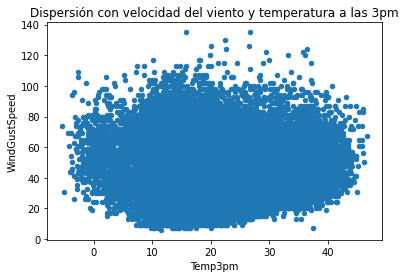

In [ ]:
#Gráfico de dispersión.
aus.plot.scatter(y="WindGustSpeed", x="Temp3pm")
plt.title('Dispersión con velocidad del viento y temperatura a las 3pm')

Se puede observar que no tiene mucha relación la temperatura a las 3pm con la velocidad del viento, esto para nosotros es importante ya que comenzamos a descartar algunas teorías, como por ejemplo, mientras menos sea la temperatura más sea la velocidad del viento. En este gráfico hay todo tipo de datos, hay velocidades de vientos similares con la misma temperatura y hay velocidades del viento muy distintas con la misma temperatura.

##Comparando en que ciudad llueve mas

In [ ]:
lluvia = aus.sort_values("Rainfall", ascending=False)
lluvia.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
9236,2009-11-07,CoffsHarbour,17.4,23.1,371.0,NaN,3.5,NaN,NaN,SW,...,81.0,1026.6,1025.9,8.0,5.0,18.6,22.0,Yes,4.8,Yes
136881,2011-02-16,Darwin,22.1,25.6,367.6,NaN,0.0,WSW,83.0,SSE,...,98.0,996.3,996.0,8.0,8.0,24.3,23.5,Yes,184.6,Yes
84897,2009-01-12,Cairns,22.3,27.4,278.4,NaN,0.0,NW,59.0,SSE,...,98.0,1003.5,999.6,8.0,8.0,24.7,25.3,Yes,140.2,Yes
85650,2011-02-04,Cairns,22.9,29.9,268.6,NaN,2.0,ENE,37.0,ENE,...,84.0,1011.1,1009.3,6.0,8.0,29.8,28.0,Yes,13.2,Yes
87022,2015-02-08,Cairns,23.8,31.0,247.2,NaN,2.0,E,44.0,SSE,...,74.0,1014.2,1011.4,8.0,8.0,25.3,30.0,Yes,85.4,Yes
16920,2015-04-23,Newcastle,NaN,21.7,240.0,NaN,NaN,NaN,NaN,NW,...,62.0,NaN,NaN,6.0,6.0,17.5,21.0,Yes,0.4,No
90887,2009-02-03,Townsville,22.8,25.4,236.8,NaN,0.0,ESE,48.0,ESE,...,95.0,1003.8,1000.6,8.0,8.0,23.8,25.0,Yes,93.4,Yes
40862,2016-01-06,Williamtown,18.5,19.9,225.0,NaN,0.0,S,80.0,SSW,...,90.0,1008.5,1008.8,8.0,8.0,19.2,19.4,Yes,37.4,Yes
11494,2016-06-05,CoffsHarbour,14.6,19.2,219.6,NaN,NaN,WSW,70.0,WNW,...,83.0,998.5,993.7,8.0,8.0,16.5,18.0,Yes,0.1,No
17174,2016-01-06,Newcastle,15.5,NaN,216.3,NaN,NaN,NaN,NaN,SE,...,NaN,NaN,NaN,8.0,NaN,18.8,NaN,Yes,25.4,Yes


In [ ]:
Filtro1 = aus[
    (aus['Location'].str.contains('CoffsHarbour') == True)
]

Filtro2 = Filtro1.sort_values('Date', ascending = True)
Filtro2


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
8927,2009-01-01,CoffsHarbour,16.1,31.4,0.0,7.4,11.4,NNE,54.0,N,...,58.0,1005.9,1002.3,1.0,5.0,26.5,28.4,No,0.0,No
8928,2009-01-02,CoffsHarbour,22.8,24.7,0.0,8.0,0.2,SSW,56.0,SSW,...,67.0,1010.9,1011.4,7.0,7.0,23.4,24.4,No,4.6,Yes
8929,2009-01-03,CoffsHarbour,20.0,24.1,4.6,3.4,0.2,SE,35.0,SE,...,59.0,1019.3,1018.8,8.0,7.0,21.7,23.7,Yes,0.8,No
8930,2009-01-04,CoffsHarbour,14.8,25.0,0.8,3.0,12.6,E,24.0,SSE,...,45.0,1019.5,1017.0,5.0,2.0,22.5,24.8,No,0.0,No
8931,2009-01-05,CoffsHarbour,15.5,27.3,0.0,6.6,13.1,NE,41.0,NW,...,62.0,1015.7,1012.7,1.0,6.0,24.6,26.1,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,2017-06-21,CoffsHarbour,14.5,21.4,0.0,NaN,NaN,S,39.0,WSW,...,59.0,1023.8,1022.6,NaN,7.0,17.6,20.2,No,0.0,No
11876,2017-06-22,CoffsHarbour,14.1,21.4,0.0,NaN,NaN,S,30.0,WSW,...,58.0,1026.3,1023.4,1.0,NaN,18.5,20.4,No,0.0,No
11877,2017-06-23,CoffsHarbour,8.3,20.0,0.0,NaN,NaN,SSE,20.0,NNW,...,62.0,1022.7,1017.6,NaN,NaN,15.1,19.5,No,0.0,No
11878,2017-06-24,CoffsHarbour,10.9,20.6,0.0,NaN,NaN,SW,26.0,SW,...,51.0,1017.8,1015.7,7.0,1.0,16.4,20.0,No,0.0,No


In [ ]:
nombre = ['CoffsHarbour2008','CoffsHarbour2009', 'CoffsHarbour2010', 'CoffsHarbour2011', 'CoffsHarbour2012', 'CoffsHarbour2013', 'CoffsHarbour2014', 'CoffsHarbour2015', 'CoffsHarbour2016', 'CoffsHarbour2017']
anos = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

primerFiltro = aus[
    (aus['Location'].str.contains('CoffsHarbour') == True)
]
lineas = []
for i, j in zip(nombre, anos):
    temp = primerFiltro[
        (primerFiltro['Date'].str.contains(j) == True)
    ]
    lineas.append(temp)

len(lineas)

10

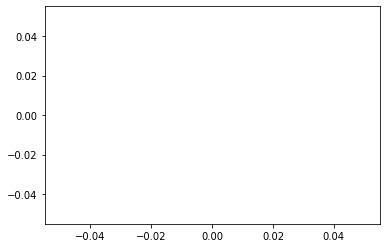

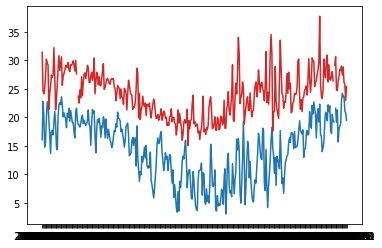

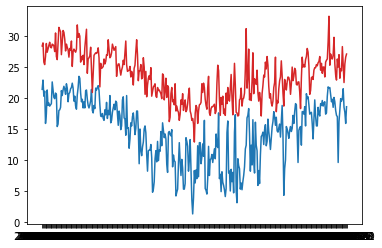

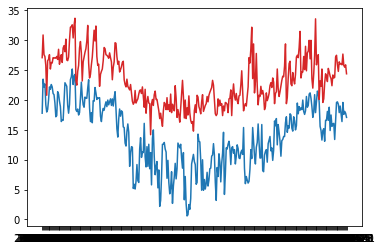

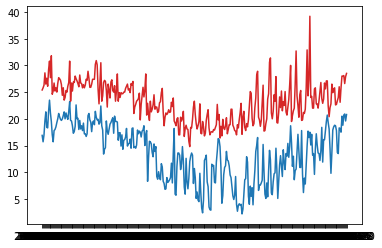

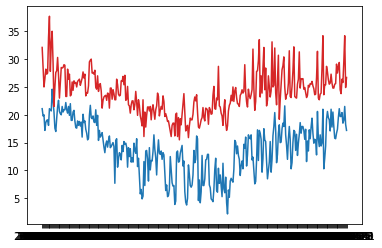

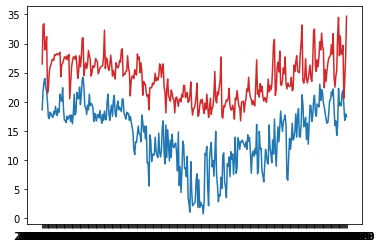

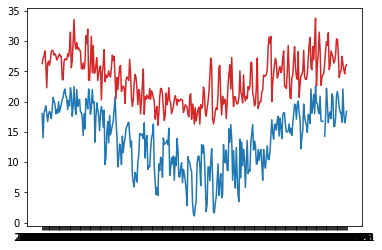

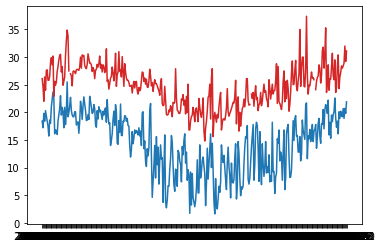

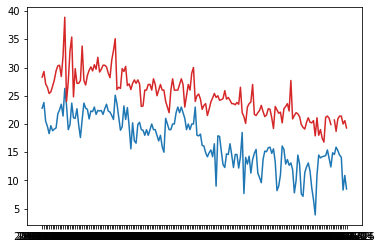

In [ ]:
for i in lineas:
    fig, ax = plt.subplots()
    ax.plot(i['Date'], i['MinTemp'], color = 'tab:blue')
    ax.plot(i['Date'], i['MaxTemp'], color = 'tab:red')
plt.show()

In [ ]:
Locaciones = aus["Location"].value_counts()
print(f"En total hay {Locaciones.count()} ciudades")

En total hay 49 ciudades


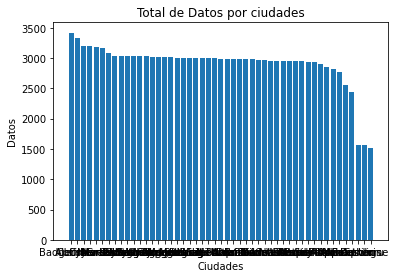

In [ ]:
# Ciudades con mayor cantidad de datos

def getGraficoBarras(label_x, label_y, title, feature):
    x_values = aus[feature].unique()
    y_values = aus[feature].value_counts().tolist()
    plt.bar(x_values, y_values)
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()
    
getGraficoBarras('Ciudades', 'Datos', "Total de Datos por ciudades", 'Location')

**Gráfico de Torta**

Text(0.5, 1.0, 'Total de los días que lluvió')

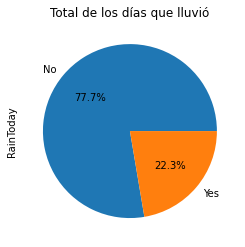

In [ ]:
#Gráfico de torta días que lluvió
RT = aus.RainToday.value_counts()
RT.plot.pie(autopct='%1.1f%%')
plt.title('Total de los días que lluvió')

Con este gráfico se puede observar que desde el año 2008 hasta el año 2017 solo lluvió un 22.3%, se puede deducir por el RainToday ya que es básicamente si va a llover hoy. En el total de los días desde el 2008 hasta el 2017 un
77.7% no lluvió.

Text(0.5, 1.0, 'Direcciones del viento a las 9am')

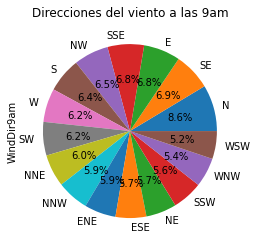

In [ ]:
#Gráfico de torta 
VV9 = aus.WindDir9am.value_counts()
VV9.plot.pie(autopct='%1.1f%%')
plt.title('Direcciones del viento a las 9am')

Este gráfico nos muestra en porcentaje, la dirección a las que va las ráfagas del viento en los registros de las 9am. 

Text(0.5, 1.0, 'Direcciones del viento a las 3pm')

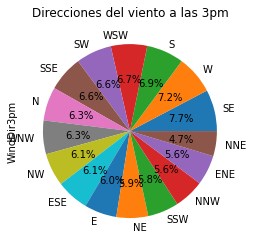

In [ ]:
#Gráfico de torta 
VV3 = aus.WindDir3pm.value_counts()
VV3.plot.pie(autopct='%1.1f%%')
plt.title('Direcciones del viento a las 3pm')

Este gráfico nos muestra en porcentaje, la dirección a las que van las ráfagas del viento en los registros de las 3pm.

**Mínima y Máxima temperatura**

In [ ]:
#Mostrar las temperaturas máximas
MTemp = aus.sort_values("MaxTemp", ascending=False)
MTemp.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
103729,2011-01-25,Woomera,25.1,48.1,0.0,22.4,12.8,WSW,85.0,NNE,...,7.0,1003.4,1000.4,3.0,2.0,33.2,46.1,No,0.0,No
13601,2014-01-03,Moree,28.3,47.3,0.0,16.0,12.0,WSW,61.0,N,...,5.0,1001.9,995.9,1.0,6.0,33.4,45.8,No,0.0,No
14600,2017-02-12,Moree,27.8,47.3,0.0,NaN,NaN,SSW,67.0,NNE,...,10.0,1003.9,998.1,7.0,1.0,32.9,46.7,No,0.0,No
29363,2017-02-11,Richmond,22.3,47.0,0.0,NaN,NaN,SW,41.0,NE,...,18.0,1008.0,1001.3,4.0,NaN,25.8,44.7,No,0.0,No
26415,2017-02-11,Penrith,23.3,46.9,0.0,NaN,NaN,W,50.0,N,...,14.0,NaN,NaN,NaN,NaN,25.3,46.2,No,0.0,No
62773,2009-02-07,MelbourneAirport,18.8,46.8,0.0,10.8,8.5,SW,83.0,N,...,10.0,1003.1,998.8,2.0,1.0,32.7,46.1,No,1.8,Yes
105832,2017-02-09,Woomera,29.3,46.8,0.0,17.2,NaN,NNW,31.0,NE,...,11.0,1007.9,1005.5,2.0,1.0,37.2,45.0,No,0.0,No
104706,2014-01-01,Woomera,28.0,46.8,0.0,23.8,13.0,NNW,74.0,N,...,1.0,1005.7,1003.0,0.0,1.0,34.9,45.8,No,0.0,No
68217,2009-02-07,Mildura,26.1,46.7,0.0,13.2,11.7,NNW,56.0,NNE,...,10.0,1004.4,1002.9,0.0,2.0,36.4,46.1,No,0.0,No
75789,2009-02-07,Watsonia,18.0,46.7,0.0,10.8,8.5,NNW,74.0,NE,...,8.0,1003.0,998.2,2.0,1.0,30.3,45.2,No,1.0,No


Con esta acción podemos obtener los primeros 15 registros que han tenido las temperaturas más altas, y aparte podemos observar algunas características meteorologicas que hubieron en dichos registros.

In [ ]:
#Mostrar las temperaturas mínimas
MITemp = aus.sort_values("MinTemp",  ascending=True)
MITemp.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
50958,2009-06-11,MountGinini,-8.5,0.6,1.0,NaN,NaN,S,31.0,WNW,...,72.0,NaN,NaN,NaN,NaN,-0.9,-0.4,No,0.0,No
52983,2015-08-04,MountGinini,-8.2,-0.8,0.0,NaN,NaN,WSW,48.0,W,...,93.0,NaN,NaN,NaN,NaN,-5.3,-1.2,No,0.8,No
48686,2011-07-29,Tuggeranong,-8.2,15.2,0.0,NaN,NaN,N,17.0,NW,...,40.0,1029.5,1025.0,NaN,NaN,-1.4,13.7,No,0.0,No
51276,2010-06-29,MountGinini,-8.0,2.1,NaN,NaN,NaN,SW,46.0,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,1.2,NaN,0.0,No
45682,2011-07-29,Canberra,-8.0,15.1,0.2,2.6,7.9,NaN,NaN,NNW,...,33.0,1029.6,1025.3,1.0,NaN,-1.2,14.5,No,0.0,No
53309,2016-06-25,MountGinini,-7.8,-1.3,7.4,NaN,NaN,SW,26.0,SSW,...,98.0,NaN,NaN,NaN,NaN,-7.0,-3.5,Yes,0.8,No
46719,2014-08-05,Canberra,-7.6,13.8,0.2,NaN,NaN,NNW,22.0,SW,...,30.0,1034.2,1031.6,NaN,NaN,1.0,12.8,No,0.0,No
52616,2014-08-02,MountGinini,-7.6,-1.4,5.8,NaN,NaN,SSW,31.0,SSE,...,80.0,NaN,NaN,NaN,NaN,NaN,-1.8,Yes,0.2,No
53327,2016-07-13,MountGinini,-7.5,-4.8,5.6,NaN,NaN,WSW,74.0,WSW,...,98.0,NaN,NaN,NaN,NaN,-7.2,-5.4,Yes,1.0,No
52625,2014-08-11,MountGinini,-7.5,-0.7,0.0,NaN,NaN,S,35.0,SSE,...,71.0,NaN,NaN,NaN,NaN,-5.2,-2.9,No,0.0,No


Con esta acción podemos obtener los primeros 15 registros que han tenido las temperaturas más bajas, y aparte podemos observar algunas características
meteorologicas que hubieron en dichos registros.